# [Pandas](https://towardsdatascience.com/learn-advanced-features-for-pythons-main-data-analysis-library-in-20-minutes-d0eedd90d086)

In [4]:
import numpy as np
import pandas as pd

* 被形容為Python中的Excel，Pandas在資料處理方面非常好用
* 處理各種格式的資料：.csv, .xls, .json, .db, …
* Pandas就處理兩種資料: DataFrame(二維向量資料框), Series(一維向量資料框)

* 使用pd.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)來建立。最主要的data可以是list, tuple, ndarray等。index預設值為由0開始之整數。

* Dictionary與Series的資料結構非常類似，可以直接轉換。

* 類似一個array，但是有index。


In [2]:
s1 = pd.Series([2,4,6,8,135])

In [3]:
type(s1)

pandas.core.series.Series

In [4]:
s1.values

array([  2,   4,   6,   8, 135], dtype=int64)

In [5]:
s1.index

RangeIndex(start=0, stop=5, step=1)

In [6]:
s2 = pd.Series(np.arange(1,7), index = ['a','b','c','d','e','f'], dtype = float, name = "Data")

In [7]:
s2

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
f    6.0
Name: Data, dtype: float64

In [8]:
s2>3

a    False
b    False
c    False
d     True
e     True
f     True
Name: Data, dtype: bool

In [9]:
print(s2[1])
print(s2['c'])
print(s2[['a','e']])
print(s2[s2>3])

2.0
3.0
a    1.0
e    5.0
Name: Data, dtype: float64
d    4.0
e    5.0
f    6.0
Name: Data, dtype: float64


In [10]:
type(s2[['a','e']])

pandas.core.series.Series

In [11]:
s2.loc['b':]

b    2.0
c    3.0
d    4.0
e    5.0
f    6.0
Name: Data, dtype: float64

In [12]:
s2.iloc[2:]

c    3.0
d    4.0
e    5.0
f    6.0
Name: Data, dtype: float64

In [13]:
s2*3

a     3.0
b     6.0
c     9.0
d    12.0
e    15.0
f    18.0
Name: Data, dtype: float64

In [14]:
s2[s2>=3]

c    3.0
d    4.0
e    5.0
f    6.0
Name: Data, dtype: float64

In [15]:
my_data = {"name":"Tony","ID":"A12345",4:"is GPA"}

In [16]:
s3 = pd.Series(my_data)

In [17]:
s3

name      Tony
ID      A12345
4       is GPA
dtype: object

In [18]:
s4 = pd.Series(my_data,index=s1)

In [19]:
s4

2         NaN
4      is GPA
6         NaN
8         NaN
135       NaN
dtype: object

In [20]:
s4.isnull()

2       True
4      False
6       True
8       True
135     True
dtype: bool

In [21]:
s4.name='result'

In [22]:
s4

2         NaN
4      is GPA
6         NaN
8         NaN
135       NaN
Name: result, dtype: object

In [23]:
s1.index = ['a','b','c','d','e']

In [24]:
s1

a      2
b      4
c      6
d      8
e    135
dtype: int64

In [25]:
s5 = pd.Series([2,3,4,5,6],index=['a','b','c','d','e'])

In [26]:
s1

a      2
b      4
c      6
d      8
e    135
dtype: int64

In [27]:
s1*s5

a      4
b     12
c     24
d     40
e    810
dtype: int64

## DataFrames
* 可想成是好幾個Series的組合
* pd.DataFrame(資料陣列,columns=行名,index=列名)
* pd.DataFrame(mydata, columns=list("ABC"),index=list(range1,6))

In [1]:
dict1 = {"key1":"value1","key2":"value2"}

In [2]:
dict1["key1"]

'value1'

In [11]:
data = pd.DataFrame({'Subject':['Chinese','English','Mathematics'],'Scores':[90,86,79]})

In [12]:
data.loc[0:1,:]

,Subject,Scores
0,Chinese,90
1,English,86


In [13]:
data.index=['Student A','Student B','Student C']

In [19]:
a1 = data.loc[['Student A','Student B'],['Scores']]

In [20]:
a2 = data.loc[['Student A','Student B'],'Scores']

In [22]:
type(a2)

pandas.core.series.Series

In [ ]:
q_array = np.array([[75,60,80],[60,70,60]])

In [33]:
75 60 80
60 70 60

SyntaxError: invalid syntax (<ipython-input-33-cef1994f3c56>, line 1)

In [34]:
quiz = pd.DataFrame(q_array.T)

In [35]:
quiz = pd.DataFrame(q_array.T,index=['Tony','Eric','Eugenia'],columns=['Chinese','English'])

In [36]:
quiz['sum'] = np.sum(quiz,axis=1)

In [37]:
quiz

,Chinese,English,sum
Tony,75,60,135
Eric,60,70,130
Eugenia,80,60,140


In [38]:
type(quiz)

pandas.core.frame.DataFrame

In [39]:
quiz.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Tony to Eugenia
Data columns (total 3 columns):
Chinese    3 non-null int32
English    3 non-null int32
sum        3 non-null int64
dtypes: int32(2), int64(1)
memory usage: 72.0+ bytes


In [40]:
quiz.drop(quiz.columns[1],axis=1)

,Chinese,sum
Tony,75,135
Eric,60,130
Eugenia,80,140


In [41]:
quiz.drop(quiz.index[1],axis=0)

,Chinese,English,sum
Tony,75,60,135
Eugenia,80,60,140


In [42]:
quiz

,Chinese,English,sum
Tony,75,60,135
Eric,60,70,130
Eugenia,80,60,140


In [43]:
quiz.loc['Tony']

Chinese     75
English     60
sum        135
Name: Tony, dtype: int64

In [44]:
frame = pd.DataFrame(np.arange(12).reshape((4,3)),index=[['a','a','b','b'],[1,2,1,2]],columns=[['Ohio','Ohio','Colorado'],['Green','Red','Green']])

In [45]:
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [46]:
frame.loc['a',1]

Ohio      Green    0
          Red      1
Colorado  Green    2
Name: (a, 1), dtype: int32

In [47]:
df.loc[2:3, "B":"C"]

NameError: name 'df' is not defined

In [48]:
df.loc[df.B>0, "C"]=0

NameError: name 'df' is not defined

In [52]:
frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [49]:
frame.describe()

Ohio              Colorado
          Green        Red      Green
count  4.000000   4.000000   4.000000
mean   4.500000   5.500000   6.500000
std    3.872983   3.872983   3.872983
min    0.000000   1.000000   2.000000
25%    2.250000   3.250000   4.250000
50%    4.500000   5.500000   6.500000
75%    6.750000   7.750000   8.750000
max    9.000000  10.000000  11.000000

In [51]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4 entries, (a, 1) to (b, 2)
Data columns (total 3 columns):
(Ohio, Green)        4 non-null int32
(Ohio, Red)          4 non-null int32
(Colorado, Green)    4 non-null int32
dtypes: int32(3)
memory usage: 440.0+ bytes


# Example

In [57]:
dir_str = r'C:\Users\miguellok\Google 雲端硬碟\Coding練習\Jupyter_Practice\108_Spring\Class_SophomoreA_Python\week12-13\stock_2330.csv'

In [58]:
data = open(dir_str,encoding='cp950')

In [59]:
df = pd.read_csv(data)

In [60]:
df.describe()

,開盤價,最高價,最低價,收盤價,漲跌價差,Unnamed: 9
count,23.000000,23.000000,23.000000,23.000000,23.000000,0.0
mean,245.978261,247.478261,244.304348,245.804348,0.434783,NaN
std,6.036778,6.570385,5.853785,6.249980,3.790851,NaN
min,238.000000,240.000000,238.000000,239.000000,-7.500000,NaN
25%,242.250000,243.750000,240.000000,241.500000,-2.000000,NaN
50%,245.000000,246.500000,243.500000,244.500000,0.500000,NaN
75%,247.000000,248.000000,245.500000,247.250000,2.500000,NaN
max,264.500000,268.000000,262.500000,263.500000,9.500000,NaN


In [61]:
df.head()

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,Unnamed: 9
0,107/08/01,"29,777,161","7,375,488,342",247.0,248.0,246.5,248.0,2.0,"11,667",NaN
1,107/08/02,"22,775,110","5,611,725,541",249.0,249.5,243.5,244.5,-3.5,"10,343",NaN
2,107/08/03,"25,165,097","6,205,758,662",246.0,248.0,245.0,247.0,2.5,"9,585",NaN
3,107/08/06,"22,364,568","5,487,396,854",245.0,247.0,244.0,245.5,-1.5,"9,732",NaN
4,107/08/07,"24,352,418","5,922,738,042",245.0,245.5,241.5,241.5,-4.0,"9,665",NaN


In [62]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [63]:
#把某一數據找出來
df[["開盤價","收盤價","成交股數"]]

,開盤價,收盤價,成交股數
0,247.0,248.0,"29,777,161"
1,249.0,244.5,"22,775,110"
2,246.0,247.0,"25,165,097"
3,245.0,245.5,"22,364,568"
4,245.0,241.5,"24,352,418"
5,245.0,247.5,"24,382,432"
6,247.0,247.0,"15,128,655"
7,246.5,245.0,"16,125,492"
8,241.5,240.5,"17,881,194"
9,245.0,243.5,"17,488,913"


In [64]:
type(df[["開盤價","收盤價","成交股數"]])

pandas.core.frame.DataFrame

In [65]:
df.開盤價

0     247.0
1     249.0
2     246.0
3     245.0
4     245.0
5     245.0
6     247.0
7     246.5
8     241.5
9     245.0
10    244.5
11    238.0
12    239.5
13    239.5
14    239.0
15    241.5
16    243.0
17    245.5
18    246.0
19    248.5
20    253.5
21    264.5
22    257.5
Name: 開盤價, dtype: float64

In [66]:
type(df.開盤價)

pandas.core.series.Series

In [67]:
df.loc[:,'開盤價']

0     247.0
1     249.0
2     246.0
3     245.0
4     245.0
5     245.0
6     247.0
7     246.5
8     241.5
9     245.0
10    244.5
11    238.0
12    239.5
13    239.5
14    239.0
15    241.5
16    243.0
17    245.5
18    246.0
19    248.5
20    253.5
21    264.5
22    257.5
Name: 開盤價, dtype: float64

In [68]:
type(df.loc[:,'開盤價'])

pandas.core.series.Series

In [69]:
df.loc[:,['開盤價']]

,開盤價
0,247.0
1,249.0
2,246.0
3,245.0
4,245.0
5,245.0
6,247.0
7,246.5
8,241.5
9,245.0


In [70]:
type(df.loc[:,['開盤價']])

pandas.core.frame.DataFrame

In [71]:
df.iloc[:,[3]]

,開盤價
0,247.0
1,249.0
2,246.0
3,245.0
4,245.0
5,245.0
6,247.0
7,246.5
8,241.5
9,245.0


In [72]:
type(df.iloc[:,[3]])

pandas.core.frame.DataFrame

In [73]:
type(df.loc[:,'開盤價'])

pandas.core.series.Series

In [74]:
Oprice = df.開盤價.values

In [75]:
df2 = df[["日期","開盤價","最高價","最低價","收盤價","成交股數"]]

In [76]:
print(df2.loc[3,"最低價"])
print(df2.iloc[3,3])
print(df2.loc[3:4,["最低價","收盤價"]])
print(df2.iloc[3:5,3:5])
#df3 = df2

244.0
244.0
     最低價    收盤價
3  244.0  245.5
4  241.5  241.5
     最低價    收盤價
3  244.0  245.5
4  241.5  241.5


In [77]:
Oprice.mean() #平均值

245.97826086956522

In [78]:
Oprice.std() # 標準差

5.904085285832332

In [79]:
df_mean = df.mean()

In [80]:
df_summary = df.describe()

In [81]:
df["均價"] = df[["開盤價","最高價","最低價","收盤價"]].mean(1)

In [82]:
df.sort_values(by=["均價"],ascending=False).head(7)

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,Unnamed: 9,均價
21,107/08/30,"52,622,808","13,914,404,873",264.5,268.0,262.5,263.5,4.5,"22,862",NaN,264.625
22,107/08/31,"70,000,506","17,920,548,387",257.5,259.0,254.0,256.0,-7.5,"19,019",NaN,256.625
20,107/08/29,"57,633,182","14,784,556,456",253.5,259.0,253.5,259.0,9.5,"25,668",NaN,256.250
19,107/08/28,"40,410,531","10,075,613,779",248.5,250.0,248.0,249.5,4.5,"16,881",NaN,249.000
0,107/08/01,"29,777,161","7,375,488,342",247.0,248.0,246.5,248.0,2.0,"11,667",NaN,247.375
6,107/08/09,"15,128,655","3,740,736,404",247.0,248.0,246.0,247.0,-0.5,"7,127",NaN,247.000
1,107/08/02,"22,775,110","5,611,725,541",249.0,249.5,243.5,244.5,-3.5,"10,343",NaN,246.625


In [83]:
type(Oprice)

numpy.ndarray

In [84]:
import matplotlib.pyplot as plt

Text(0,0.5,'Open Price')

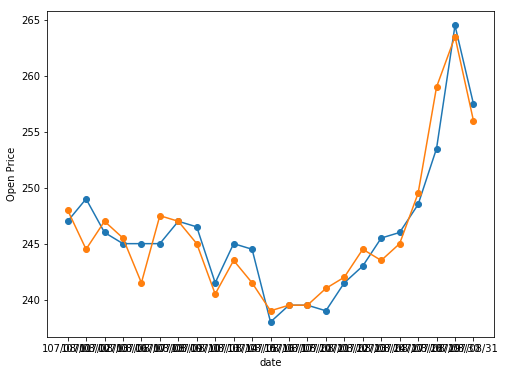

In [85]:
plt.figure(1, figsize=(8, 6))
plt.plot(df.日期,df.開盤價,'o-')
plt.plot(df.日期,df.收盤價,'o-')
plt.xlabel("date")
plt.ylabel("Open Price")

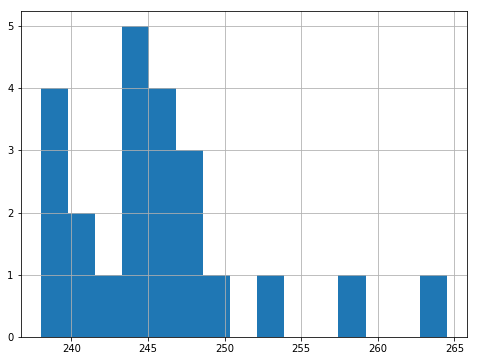

In [86]:
plt.figure(1, figsize=(8, 6))
df.開盤價.hist(bins=15)

In [87]:
mydata = np.random.randn(4,3)

In [88]:
df1 = pd.DataFrame(mydata, 
                   index = list(range(1,5)),
                   columns = list("ABC"))

In [89]:
df = pd.read_csv('stock_2330.csv', encoding = "cp950")

df2 = df[["日期","開盤價","最高價","最低價","收盤價","成交股數"]]
df2["成交股數"].apply(lambda x: x.replace(',',''))
#pd.to_numeric(df2.成交股數)



df2.loc[3,"最低價"]
df2.iloc[3,3]
df2.loc[3:4,["最低價","收盤價"]]
df2.iloc[3:5,3:5]
df3 = df2


df_mean = df.mean()
df_summary = df.describe()


# 算收益

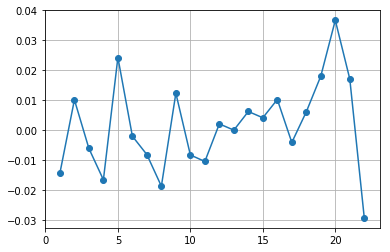

In [90]:
CL_price = df.收盤價
r = CL_price.diff()/CL_price
plt.plot(r,'o-')
#r[-100:].plot()
plt.grid()

# 算移動平均線

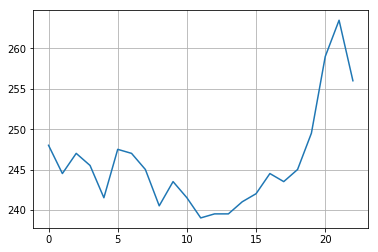

In [91]:
# 移動平均
CL_price.plot()
CL_MA20 = CL_price.rolling(window=20).mean()
#CL_MA60 = CL_price.rolling(window=60).mean()
#plt.plot(CL_price,label='close')
#plt.plot(CL_MA20,label='20天收盤移動平均價')
#plt.plot(CL_MA60,label='60天收盤移動平均價')
plt.grid()
plt.show()